# Basics For Molecular Data Handling

1. S. C. Teguia Kouam, steve.teguia@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Douala
1. J-P. Tchapet Njafa, jean-pierre.tchapet@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Maroua
1. S. G. Nana Engo, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
       
*September 2023*

This Tutorial aims to aid in the process of handling molecular data to be used for **cheminformatics works**. For this purpose, as first step, we will learn how to deal with molecular **SMILES** (Simplified Molecular Input Line Entry System), being one of the most common practice to represent molecules as raw input for computer algorithms.

## Download Our DataBase

To move forward, we suggest downloading first a dataset containing molecular files. We choose an arbitrary dataset from the `Zenodo` repository (https://zenodo.org/record/4641960/files/Diversity.zip?download=1). This dataset is composed of several molecular files (with `.txt` extensions) each of them containing a list of SMILES.


## Read Molecular Files 

In [1]:
# import libraries
import os

In [4]:
# path to the current work directory
main_path = os.getcwd()
# path to the database
#path_to_db = os.path.join(main_path + '/../Datasets/Diversity/diversity/')
# path to a specific molecular file: first file containing 1000 SMILES
mol_file = main_path  + '/chembl_24.1_smiles-n=1000-min_tc=0.0-sample_idx=1.txt'

**1. First Method**

In [5]:
with open(mol_file, 'r') as file:
    file1 = file.read().split('\n')

type(file1)

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/GitNindjapatrick/chembl_24.1_smiles-n=1000-min_tc=0.0-sample_idx=1.txt'

**Select the first molecular smiles of the file**

In [4]:
smiles1 = file1[0]
smiles1

'CCC[N+](CC#Cc1ccccc1)(CCC)CC(=O)c1ccc(Cl)cc1'

**2. Second Method**

In [5]:
# open the file while changing the encoding to 'utf-8'
file2 = open(mol_file, encoding='utf-8')

file2

<_io.TextIOWrapper name='/home/mvoto/Téléchargements/RC1/chembl_24.1_smiles-n=1000-min_tc=0.0-sample_idx=1.txt' mode='r' encoding='utf-8'>

In [6]:
# read the lines of the molecular file
lin = file2.readlines()

In [7]:
len(lin)

1000

**Select the first molecular smiles of the file**

In [8]:
smiles1 = lin[0].split()[0]
smiles1

'CCC[N+](CC#Cc1ccccc1)(CCC)CC(=O)c1ccc(Cl)cc1'

## Create Molecular Objects

### **Using `OpenBabel`**

In [9]:
# import libraries 
from openbabel import pybel as pb  
from openbabel import openbabel as ob 

**create an `openbabel` molecular object**

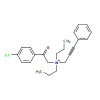

In [10]:
# create an openbabel molecular object
obmol = pb.readstring('smiles', smiles1)
obmol    renvoie  mf


**Add Hydrogen atoms to our molecule for 3D**

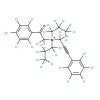

In [14]:
# add Hs to our Molecule
obmol.addh()
obmol

**Generate 3D Structure-Coordinates of every atoms in the molecule**

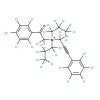

In [15]:
# generate 3D structure 
obmol.make3D()
obmol

In [11]:
ob_mol = obmol.OBMol
sp = []
coords = []
for atom in ob.OBMolAtomIter(ob_mol):
    sp.append(atom.GetAtomicNum())
    coords.append([atom.GetX(), atom.GetY(), atom.GetZ()])

print(sp)
print(coords)

[6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 17, 6, 6]
[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


In [12]:
ob_mol.NumAtoms()

26

### **Using `RDKit`**

In [1]:
# import libraries
from rdkit.Chem import AllChem
from rdkit import Chem

**create `RDKit` molecular object**

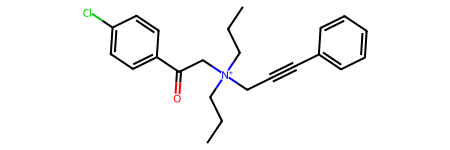

In [14]:
rdmol = Chem.MolFromSmiles(smiles1)
rdmol

**Add explicit Hydrogen atoms to our molecule for 3D generation**

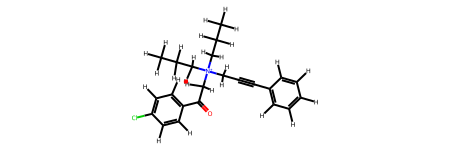

In [15]:
rdmol = Chem.AddHs(rdmol)
rdmol

In [16]:
# check the number of atoms in the molecule
rdmol.GetNumAtoms()

53

**Try to generate `conformers` and embed them to the 3D structure**

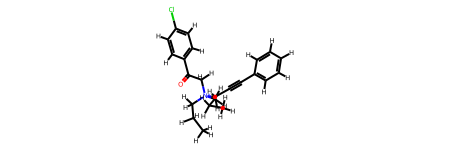

In [17]:
confid = AllChem.EmbedMolecule(rdmol)
rdmol

In [18]:
# returns the id of the generated conformer,
# and -1 if no conformers were generated
confid

0

**Generate 3D atomic coordinates of the molecule**

In [19]:
for i, atom in enumerate(rdmol.GetAtoms()):
        positions = rdmol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -1.028131340943831 -4.282208908827857 -1.0468566473063163
C -1.876558689353685 -3.1692416350768453 -1.5336271995584714
C -1.9817449146341122 -1.9504568061158376 -0.6825408716546919
N -0.8307965073688657 -1.196767238145799 -0.4148037366059319
C 0.030205696216546906 -1.2952343388875707 -1.635501050105182
C 1.3051482138689026 -0.5880404866040065 -1.3400114761416488
C 2.330814767868759 0.0005253065201858681 -1.1065672460515559
C 3.534602594765519 0.7178800959336887 -0.8334682228604449
C 4.5290528965083245 0.15086822776749007 -0.0627046454578239
C 5.692041852807918 0.8378264832427833 0.20513018635427113
C 5.891963441481194 2.1153023088557013 -0.2928947161638436
C 4.911069224296034 2.694019058507135 -1.062295541822523
C 3.758175978429987 1.9928577039794149 -1.3183513946928802
C 0.015186221485924686 -1.485808357469353 0.6621916149041327
C -0.4669426165834004 -2.0644865714041347 1.91679998354642
C 0.7173429081579362 -2.2748249722655274 2.885899744954497
C -1.1668791943063983 0.22283561313515

**`Optimze` the molecular strcuture with `MMFF94` ForceField**

In [20]:
rdmol1=rdmol
rdmol2=rdmol


_ utilisation de `MFFOptimizeMolecule` comme optimisation._

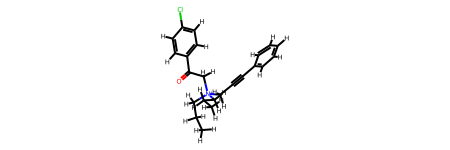

In [21]:
AllChem.MMFFOptimizeMolecule(rdmol)
rdmol

_ utilisation de `UFFOptimizeMolecule` comme optimisation._

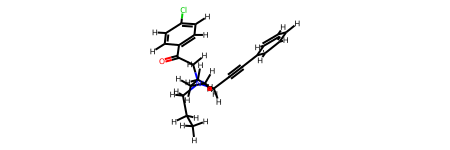

In [22]:
AllChem.UFFOptimizeMolecule(rdmol1)
rdmol1

_ utilisation de `MMFFGetMoleculeForceField` comme optimisation._

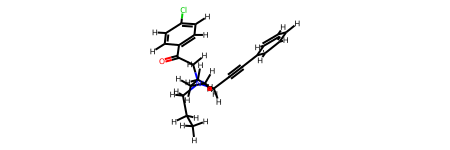

In [23]:
num_conformers = 100  # Nombre de conformères à générer

# Obtention des propriétés MMFF de la molécule
mmff_props = AllChem.MMFFGetMoleculeProperties(rdmol2)
# Vérification du nombre de conformères générés
num_generated_conformers = len(rdmol2.GetConformers())
if num_generated_conformers < num_conformers:
    num_conformers = num_generated_conformers

# Optimisation des conformères générés
for i in range(num_conformers):
    ff = AllChem.MMFFGetMoleculeForceField(rdmol2, mmff_props, confId=i)
    
rdmol2

_ utilisation de `UFFOptimizeMolecule` comme optimisation._

**Generate 3D atomic coordinates of the optimized structure**

In [24]:
for i, atom in enumerate(rdmol.GetAtoms()):
        positions = rdmol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -1.2404974066749919 -4.387034837889502 -0.24723057883274321
C -1.6868192758981855 -3.5991495952768386 -1.4743783049930457
C -1.9708016193385873 -2.0890807587015434 -1.2303097914222312
N -0.8029942868652238 -1.1615487620770713 -0.9616318292797899
C 0.3485736220395304 -1.5525359260868081 -1.8479561746755842
C 1.5265264834102121 -0.6655511023504087 -1.7322014789015197
C 2.4783254179212015 0.06500187080637292 -1.6194224616601294
C 3.6057284886452963 0.9453722919627455 -1.4687752129930902
C 4.206888044831966 1.104861115936231 -0.21241351253943722
C 5.297656783867202 1.9683514356220884 -0.06399242661829312
C 5.787112085282844 2.675564101164584 -1.167146828160709
C 5.186593661547637 2.519982060389367 -2.4203343953552183
C 4.097343575443442 1.6553741882871693 -2.57314193156963
C -0.3179526738135001 -1.1704679585304592 0.46965133486999605
C -1.3807447470388152 -1.357260347150316 1.583470229686813
C -0.8505977290182957 -0.8879444192378958 2.9363913764371286
C -1.205922548419352 0.2377343132774

## Save molecular structures

**`.xyz` File**

In [25]:
Chem.MolToMolFile(rdmol, 'RC1_rdmol.xyz')

**`.sdf` File**

In [26]:
Chem.MolToMolFile(rdmol, 'RC1_rdmol.sdf')

**`.mol` File**

In [27]:
Chem.MolToMolFile(rdmol, 'RC1_rdmol.mol')

The molecular files generated above only contain information on _spatial atomic coordinates_ and _bond connectivities_. However they are capable of carrying more information than that, such as molecular properties (_internal energy_, _enthalpy_, etc.).

We are interested in the fact that all the information contained in each molecular file can be used to infer insights of significant importance when dealing with __structure-property relationships__. Indeed, all of this information leads to several categories of molecular representations which can be useful, each with a _specific level of content_, to molecular description. 

A deep understanding of quantitative structure-property relationships (QSPR) finds applications in real current global challenges such as **materials discovery**, **drug discovery processes**, **chemical property predictions**, etc.

## Molecular Descriptors - Dimensional Representations

Molecular descriptors can be classified in two main categories:

1. **Experimental descriptors**: Physicochemical properties from __numerical simualtions__ or __experimental measurements__

2. **Theoretical descriptors**: Obtained from __symbolic representations__ of the molecules, such as structural formula, empirical formula, or `SMILES`. 

This category can be divided in **five** classes.


![](MolecularDimension.png)

1. **0D descritors**. Related to `Composition` discriptors, do not provide any information about the molecular structure or connectivity of atoms.

1. **1D descritors**. Related to sets of substructures such as functional groups.

1. **2D descritors**. Features providing information on molecular topology based on the graph representation of the molecules.

1. **3D descritors**. Geometrical features providing information about spatial coordinates of atoms of a molecule.

1. **4D descritors**. Also known as **grid-based descriptors**, introduce a fourth dimension characterizing the interactions between the molecules and the active sites of a receptor or the multiple conformational states of the molecules. 

# `Tartarus` Basic Usage

For this first session, we will introduce the basics of `Tartarus`: A benchmark platform for practical inverse molecular design. To this end, after the installation task of the module `tartarus`, we will look at its framework. 

![](tartarusoverview.png)

## In Practice

**1. Design of `OPVs` - Framework**

![](opv.png)

**2. Design of `Organic Emitters` - Framework**

![](emitters.png)

**3. Design of `Protein Ligands` - Framework**

![](docking.png)


## Practical Coding For `OPV` Design - Use `Tartarus` As A Blackbox

**1. Load the data used for this purpose into the original work**

In [28]:
# path to the hce.csv data 
path_to_hce = os.path.join(main_path + '/hce.csv')

In [29]:
# display the .csv file as dataframe
import pandas as pd
hce = pd.read_csv(path_to_hce)
hce

,smiles,pce_pcbm_sas,pce_pcdtbt_sas,pce_1,pce_2,sas
0,c1sc(-c2[SiH2]c(cc2)-c2ccc(-c3scc4occc34)c3csc...,-1.061257,-4.382105,3.320848,0.0,4.382105
1,c1ccc(C2=Cc3oc4c(c3C2)c2c[nH]cc2c2ccc3=CCC=c3c...,-3.188265,-3.607924,0.419659,0.0,3.607924
2,c1cc2sc3cc4ccc5cscc5c4cc3c2c2cCcc12,-0.767370,-3.361486,2.594116,0.0,3.361486
3,[nH]1c2cc(-c3ccc[se]3)c3c[nH]cc3c2c2c1c1[se]cc...,-3.572659,-4.618362,1.045703,0.0,4.618362
4,[SiH2]1C=CC=C1c1cc2sc3c4[se]ccc4c4cocc4c3c2c2c...,-1.675279,-4.853093,3.177815,0.0,4.853093
...,...,...,...,...,...,...
24948,[SiH2]1C=CC=C1C1=Cc2cc3ccc4ccc5c[nH]cc5c4c3cc2...,-2.797039,-4.418456,1.621417,0.0,4.418456
24949,c1cc2ccc3cc4cc(-c5ncncn5)c5=C[SiH2]C=c5c4cc3c2...,1.610517,-3.828723,5.439241,0.0,3.828723
24950,c1sc(c2C=CCc12)-c1cc2ncc3c4ccccc4c4ccccc4c3c2cn1,-0.239583,-2.952342,2.712759,0.0,2.952342
24951,c1sc(-c2ccc(s2)-c2Cc(cc2)-c2cncc3nsnc23)c2ccsc12,4.575720,-3.706835,8.282555,0.0,3.706835


**2. Use the `SMILES` from the diversity data loaded above to run `Tartarus`**

In [30]:
# creat an empty dictionary
from collections import defaultdict
data1 = defaultdict(list)

**Get a database similar to the one from the original work**

In [31]:
for i in range(len(lin)):
    smiles = lin[i].split()[0]
    if i==2: break
    data['smiles'].append(smiles)



df = pd.DataFrame(data)
df

,smiles
0,CCC[N+](CC#Cc1ccccc1)(CCC)CC(=O)c1ccc(Cl)cc1
1,NC(=S)NN=Cc1ccc(O)cc1O


In [37]:
# save the dataframe to `.csv` file
df.to_csv('my_hce.csv')

In [38]:
smiles = df['smiles'].tolist()
smi = smiles[1]


In [39]:
smi

'NC(=S)NN=Cc1ccc(O)cc1O'

In [38]:
    renvoie  mf    renvoie  mf


conda install scipy

In [41]:
pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 31.7 kB/s eta 0:00:0031m28.9 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 7.1 kB/s eta 0:00:006.5 kB/s eta 0:00:02m
Note: you may need to restart the kernel to use updated packages.


In [42]:

from tqdm import tqdm

In [43]:
## use full xtb calculation in hce module
from tartarus import pce
from tartarus import docking
#from tartarus import tadf
#from tartarus import reactivity

dipm, gap, lumo, combined, pce_pcbm_sac, pce_pcdtbt_sas = tqdm(pce.get_properties(smi))




/home/mvoto/anaconda3/envs/tartarus/lib/python3.8/site-packages/tartarus/filter_.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _filters = [Chem.MolFromSmarts(x) for x in _mcf.append(_pains, sort=True)['smarts'].values]
